In [26]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [27]:
#Import Dataset
path = (r'\Users\James\Desktop\Datasets\netflix new.csv')
df = pd.read_csv(path)
#I want to work with only complete rows as i want to compare the websites where the votes came from
print(df.info())
df = df.dropna()
#Remove all Series from the dataset
df = df[df['Series or Movie'].str.contains('Series')==False].reset_index(drop=True)
print(df.info())
#This function normalises a given column of data between 0 and 1
def normalise(column):
    df_max = column.max()
    df_min = column.min()
    column = column.copy()
    for i in range(len(column)):
        column.loc[i] = (column.loc[i] - df_min) / (df_max - df_min)
    return column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15480 entries, 0 to 15479
Data columns (total 24 columns):
Title                    15480 non-null object
Genre                    13770 non-null object
Tags                     15413 non-null object
Languages                13545 non-null object
Series or Movie          15480 non-null object
Hidden Gem Score         13379 non-null float64
Country Availability     15461 non-null object
Runtime                  15479 non-null object
Director                 10772 non-null object
Writer                   11150 non-null object
Actors                   13555 non-null object
View Rating              8456 non-null object
IMDb Score               13381 non-null float64
Rotten Tomatoes Score    6382 non-null float64
Metacritic Score         4336 non-null float64
Awards Received          6075 non-null float64
Awards Nominated For     7661 non-null float64
Boxoffice                4007 non-null object
Release Date             13373 non-null objec

In [28]:
#Normalise the score columns using the normalise function
df['IMDb Score'] = normalise(df['IMDb Score'])
df['Rotten Tomatoes Score'] = normalise(df['Rotten Tomatoes Score'])
df['Metacritic Score'] = normalise(df['Metacritic Score'])

In [29]:
X = df[['Rotten Tomatoes Score','Metacritic Score']]
y = df['IMDb Score']
print(X)
model = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.2)

model.fit(X_train,y_train)
y_predict = model.predict(X_test)

      Rotten Tomatoes Score  Metacritic Score
0                      0.68          0.563830
1                      0.52          0.478723
2                      0.96          0.840426
3                      0.85          0.702128
4                      0.89          0.851064
...                     ...               ...
2120                   0.45          0.446809
2121                   0.36          0.446809
2122                   0.63          0.489362
2123                   0.25          0.414894
2124                   0.02          0.170213

[2125 rows x 2 columns]


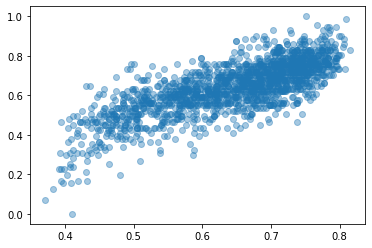

In [30]:
plt.scatter(y_predict,y_test, alpha=0.4)
plt.show()

In [31]:
def line_of_best_fit(x,y):
    m,b = np.polyfit(x,y,1)
    return m*x + b

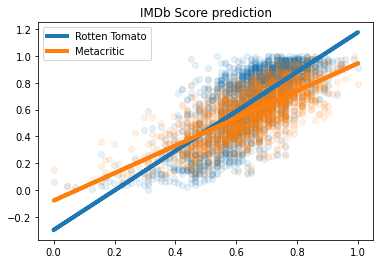

In [32]:
IMDb = df['IMDb Score']
Rotten = df['Rotten Tomatoes Score']
Meta = df['Metacritic Score']

l_width = 4.0

plt.scatter(IMDb, Rotten, alpha=0.1)
plt.scatter(IMDb, Meta, alpha=0.1)

plt.plot(IMDb,line_of_best_fit(IMDb,Rotten),linewidth=l_width)
plt.plot(IMDb,line_of_best_fit(IMDb,Meta),linewidth=l_width)
plt.title('IMDb Score prediction')
plt.legend(['Rotten Tomato','Metacritic'])
plt.show()

In [33]:
#This gives us all the movies where English is an availiable language
df['Languages'] = df['Languages'].str.replace(',', ' ')
df_english = df[df['Languages'].str.contains('English') == True].reset_index(drop=True)

In [34]:
new = df_english['Tags'].str.join('*').str.get_dummies('*').multiply(df_english['IMDb Score'], 0).mean()
print(new.describe())


count    69.000000
mean      0.235013
std       0.232724
min       0.000297
25%       0.018280
50%       0.161979
75%       0.425092
max       0.638210
dtype: float64


In [35]:
tags = df_english['Tags'].str.split(',', expand=True).stack().value_counts()
Tags_list = tags.index.tolist()
pattern = '|'.join(Tags_list)

In [36]:
total_imdb = df_english['Tags'].str.contains(pattern).agg({'IMDb Score':'mean'})
print(total_imdb.head())
print(df_english.head())
tags = tags.to_frame()
tags.reset_index(inplace=True)
tags.rename({0:'Count','index':'Tag'}, axis=1, inplace=True)
top = tags.loc[tags['Count'] > 0]
print(top.tail())
print(top.head())

IMDb Score    1.0
Name: Tags, dtype: float64
              Title                               Genre  \
0             Joker              Crime, Drama, Thriller   
1                 I  Action, Adventure, Fantasy, Sci-Fi   
2  Harrys Daughters  Adventure, Drama, Fantasy, Mystery   
3   Ordinary People                               Drama   
4       Stand by Me                    Adventure, Drama   

                                                Tags          Languages  \
0  Dark Comedies,Crime Comedies,Dramas,Comedies,C...            English   
1                              Dramas,Swedish Movies  English  Sanskrit   
2                              Dramas,Swedish Movies            English   
3      Korean Movies,Thriller Movies,Crime Thrillers            English   
4                               Korean Movies,Dramas            English   

  Series or Movie  Hidden Gem Score  \
0           Movie               3.5   
1           Movie               2.8   
2           Movie               